In [1]:
from sklearn import linear_model
import numpy as np
import pandas as pd

In [5]:
h_df = pd.read_csv('hiring.csv')

In [6]:
h_df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [7]:
na_val = round(h_df['test_score(out of 10)'].mean())

In [8]:
h_df['test_score(out of 10)'] = h_df['test_score(out of 10)'].fillna(na_val)

In [9]:
h_df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [10]:
reg_model = linear_model.LinearRegression()

In [11]:
reg_model.fit(h_df[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']], h_df['salary($)'])

LinearRegression()

In [12]:
reg_model.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [13]:
reg_model.intercept_

17737.263464337695

In [14]:
print(reg_model.predict([[2, 9, 6]]), reg_model.predict([[12, 10, 10]]))

[53205.96797671] [92002.18340611]


D:\Applications\miniconda3\envs\ML\lib\site-packages\scikit_learn-1.0.1-py3.9-win-amd64.egg\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
D:\Applications\miniconda3\envs\ML\lib\site-packages\scikit_learn-1.0.1-py3.9-win-amd64.egg\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [15]:
reg_model.score(h_df[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']], h_df['salary($)'])

0.961678000257796

In [16]:
#save the model
import pickle
pickle.dump(reg_model, open('regmodel.pkl', 'wb'))

In [2]:
ti_df = pd.read_csv('titanic.csv')

In [3]:
ti_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
le = LabelEncoder()

In [10]:
target = ti_df['Survived']
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [13]:
inputs = ti_df.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'Parch', 'PassengerId', 'SibSp', 'Embarked'], axis=1)

In [15]:
inputs.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
inputs['Sex'] = le.fit_transform(inputs['Sex'])
inputs.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500


In [20]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())

In [29]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.1)

In [30]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
model.score(X_test, y_test)

0.7777777777777778

In [36]:
model.predict([[1, 0, 40, 9]])

D:\Applications\miniconda3\envs\ML\lib\site-packages\scikit_learn-1.0.1-py3.9-win-amd64.egg\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [37]:
model.predict([[1, 1, 40, 9]])

D:\Applications\miniconda3\envs\ML\lib\site-packages\scikit_learn-1.0.1-py3.9-win-amd64.egg\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [41]:
import joblib
joblib.dump(model, 'titanic_model.pkl')

['titanic_model.pkl']

In [49]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [50]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [51]:
log_reg.score(X_test, y_test)

0.7777777777777778

In [55]:
log_reg.predict([[1, 0, 40, 9]])

D:\Applications\miniconda3\envs\ML\lib\site-packages\scikit_learn-1.0.1-py3.9-win-amd64.egg\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [56]:
from sklearn.datasets import load_digits
digits = load_digits()

In [58]:
digits.data.shape

(1797, 64)

In [61]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [62]:
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [63]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.1)

In [64]:
from sklearn.svm import SVC
SVM_mod = SVC()

In [65]:
SVM_mod.fit(X_train, y_train)

SVC()

In [66]:
SVM_mod.score(X_test, y_test)

0.9944444444444445

In [67]:
y_pred = SVM_mod.predict(X_test)

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
#show confusion matrix of y_pred and y_test
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


array([[14,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 24,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 15,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 20,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 17,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 13,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 15,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 23,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 17,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 21]], dtype=int64)

Text(69.0, 0.5, 'Actual')

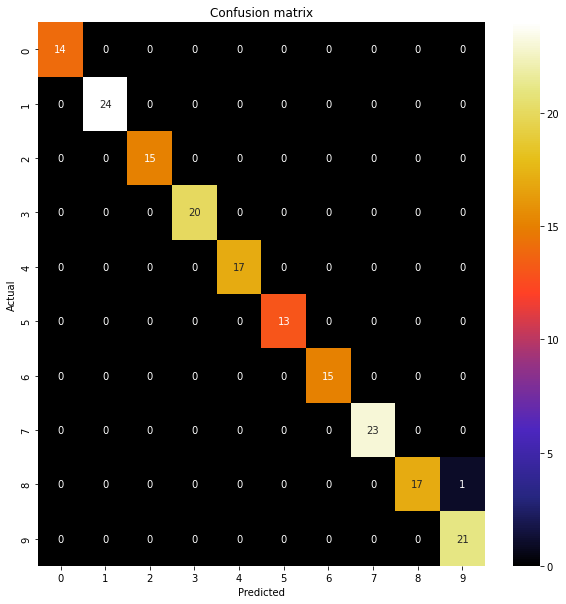

In [86]:
#plot confusion matrix using seaborn
plt.figure(figsize=(10,10))
# plt.imshow(confusion_matrix(y_test, y_pred), interpolation='nearest', cmap=plt.cm.Blues)
# plt.matshow(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap=plt.cm.CMRmap)
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [87]:
joblib.dump(SVM_mod, 'digits_model.pkl')

['digits_model.pkl']